In [1]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sriharshaeedala/financial-fraud-detection-dataset")
print("Path to dataset files:", path)

100%|██████████| 178M/178M [01:19<00:00, 2.35MB/s] 

Extracting files...


Path to dataset files: C:\Users\ABOU LFATH IDRISSI\.cache\kagglehub\datasets\sriharshaeedala\financial-fraud-detection-dataset\versions\1


In [ ]:
%pip install pandas numpy scikit-learn xgboost matplotlib seaborn

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 2.5 MB/s eta 0:00:50
    --------------------------------------- 1.6/124.9 MB 2.5 MB/s eta 0:00:50
    --------------------------------------- 1.8/124.9 MB 2.5 MB/s eta 0:00:49
    --------------------------------------- 2.4/124.9 MB 2.2 MB/s eta 0:00:56
    --------------------------------------- 2.9/124.9 MB 2.3 MB/s eta 0:00:54
   - -------------------------------------- 3.4/124.9 MB 2.3 MB/s eta 0:00:52
   - -------------------------------------- 3.9/124.9 MB 2.4 MB/s eta 0:00:51
   - -------------------------------------- 4.5/124.9 MB 2.4 MB/s eta 0:00:52
   - -------------------------------------- 5.0/124.9 MB 2.4 MB/s eta 0:00:51
   - -------------------------------------- 5.5/124.9 MB 2.4 MB/s eta 0:00:51
   - -------------------------------------- 6.0/124.9 MB 2.4 MB/s eta 0:00:50


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb

In [2]:
data=pd.read_csv("./Synthetic_Financial_datasets_log.csv",)
data =data.sample(n=100000,random_state=42)

data.shape
data.head


<bound method NDFrame.head of          step      type      amount     nameOrig  oldbalanceOrg  \
3737323   278   CASH_IN   330218.42   C632336343       20866.00   
264914     15   PAYMENT    11647.08  C1264712553       30370.00   
85647      10   CASH_IN   152264.21  C1746846248      106589.00   
5899326   403  TRANSFER  1551760.63   C333676753           0.00   
2544263   206   CASH_IN    78172.30   C813403091     2921331.58   
...       ...       ...         ...          ...            ...   
3113342   235   CASH_IN   371042.71  C1973614102     1699365.85   
5156943   357   CASH_IN    19494.57   C287170039     1921089.11   
5189870   369  CASH_OUT   141519.24   C387888280           0.00   
1551677   154   CASH_IN   635412.68  C1458432906       58610.00   
6142173   545   PAYMENT    31617.57  C1314607150       10626.00   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
3737323       351084.42   C834976624       452419.57       122201.15        0   
264

In [3]:
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [4]:
data = data.drop(['nameOrig', 'nameDest'], axis=1)

In [5]:
data = pd.get_dummies(data, columns=['type'], drop_first=True)

In [6]:
X = data.drop('isFraud', axis=1)
y = data['isFraud']

In [9]:
print(y,X)

3737323    0
264914     0
85647      0
5899326    0
2544263    0
          ..
3113342    0
5156943    0
5189870    0
1551677    0
6142173    0
Name: isFraud, Length: 100000, dtype: int64          step      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
3737323   278   330218.42       20866.00       351084.42       452419.57   
264914     15    11647.08       30370.00        18722.92            0.00   
85647      10   152264.21      106589.00       258853.21       201303.01   
5899326   403  1551760.63           0.00            0.00      3198359.45   
2544263   206    78172.30     2921331.58      2999503.88       415821.90   
...       ...         ...            ...             ...             ...   
3113342   235   371042.71     1699365.85      2070408.56      4301572.86   
5156943   357    19494.57     1921089.11      1940583.68        75635.52   
5189870   369   141519.24           0.00            0.00     12853274.23   
1551677   154   635412.68       58610.00       694022

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
model = xgb.XGBClassifier(n_estimators=100, max_depth=6, learning_rate=0.1, random_state=42, use_label_encoder=False, eval_metric='logloss')


In [13]:
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=False)


c:\ProgramData\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:20:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [14]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.99965
Confusion Matrix:
 [[19972     0]
 [    7    21]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     19972
           1       1.00      0.75      0.86        28

    accuracy                           1.00     20000
   macro avg       1.00      0.88      0.93     20000
weighted avg       1.00      1.00      1.00     20000



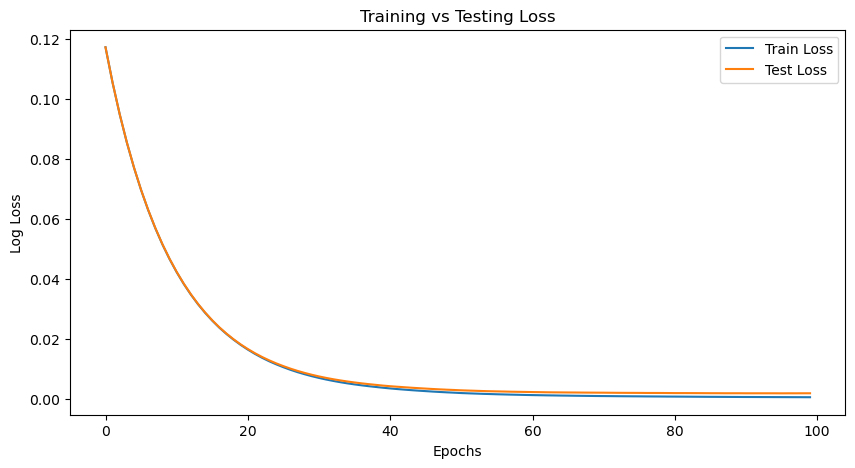

In [15]:
results = model.evals_result()

# Plot training and validation loss
epochs = len(results['validation_0']['logloss'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 5))
plt.plot(x_axis, results['validation_0']['logloss'], label='Train Loss')
plt.plot(x_axis, results['validation_1']['logloss'], label='Test Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Log Loss')
plt.title('Training vs Testing Loss')
plt.show()


In [2]:
%pip install h5py